<a href="https://colab.research.google.com/github/MiguelG26/Public_Projects/blob/master/Image%20Segmentation%20with%20KMeans%20clustering/Image%20Segmentation%20with%20KMeans%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github.com/MiguelG26/Public_Projects/Image Segmentation with KMeans clustering/Image Segmentation with KMeans clustering.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [1]:
# Common imports
import os
import urllib
import numpy as np
#from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from matplotlib.image import imread
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.preprocessing import image
from skimage.transform import resize

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Using clustering for image segmentation

In [3]:
def create_segmented_image(link, n_colors):
    if type(n_colors) == int:
        return print(f"The lenght of 'n_colors' is 1. It should be between 2 & 5. ")
    elif len(n_colors) > 5:
        return print(f"The lenght of 'n_colors' is {len(n_colors)}. It should be between 2 & 5. ")
    else:
        ############################
        #to download the image
        ############################
        link=link
        filename = link[link.rfind("/")+1:]
        urllib.request.urlretrieve(link, os.path.join(IMAGES_PATH, filename))

        ############################
        #to load the image in a variable & delete the downloaded image
        ############################
        #to upload the image as np.array to get its height & lenght
        #image0=IMAGES_PATH+"/ando.jpg" #for local images
        #my_image0 = imread(image0) #for local images
        my_image0 = imread(os.path.join(IMAGES_PATH, filename)) #for internet images
        os.remove(os.path.join(IMAGES_PATH, filename))
        
        ############################
        #to preprocess the image
        ############################  
        scaler = MinMaxScaler()
        height=300
        divider=my_image0.shape[0]/height
        lenght=int(round(my_image0.shape[1]/divider,0))

        #resize image
        my_image = resize(my_image0, (400, lenght))

        #to reshape the image from 3D to 2D & to scale values between 0 & 1
        X = my_image.reshape(-1, 3)
        X = scaler.fit_transform(X.astype(np.float64))

        ############################
        #to generate the segmented images
        ############################
        segmented_imgs = []
        for n_clusters in n_colors:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X) #train kmeans
            segmented_img = kmeans.cluster_centers_[kmeans.labels_] #to segment the images
            segmented_imgs.append(segmented_img.reshape(my_image.shape)) #to append segmented images to the list of images & reshape the image from 2D back to to 3D

        plt.figure(figsize=(20,10))
        plt.subplots_adjust(wspace=0.05, hspace=0.1)

        plt.subplot(231)
        plt.imshow(my_image)
        plt.title("Original image")
        plt.axis('off')

        for idx, n_clusters in enumerate(n_colors):
            plt.subplot(232 + idx)
            plt.imshow(segmented_imgs[idx])
            plt.title("{} colors".format(n_clusters))
            plt.axis('off')
        #to save the image as .jpg
        save_fig('image_segmentation_diagram', tight_layout=True)
        return None

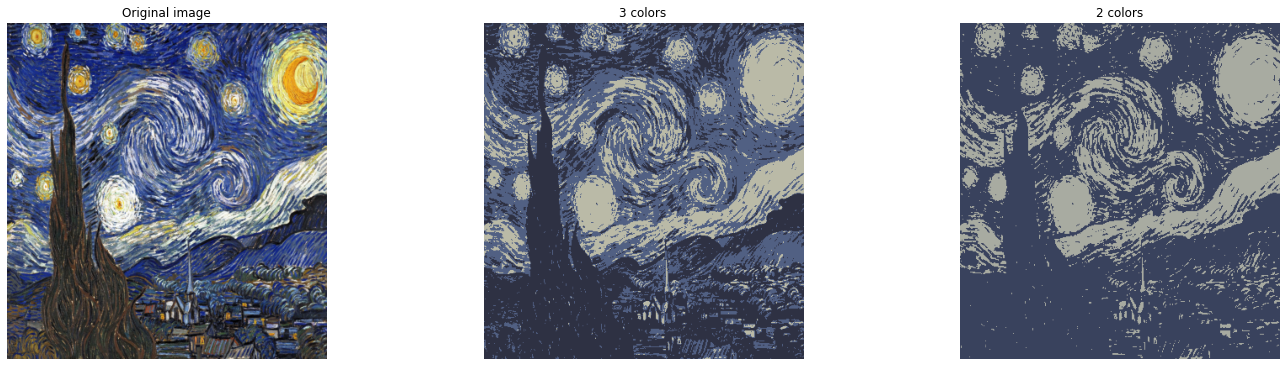

In [4]:
#link='https://www.soundandrecording.de/wp-content/uploads/2018/06/Mixpraxis-The-Beatles-RS23_05_Gatefold.jpg'
#link="https://raw.githubusercontent.com/ageron/handson-ml2/master/images/unsupervised_learning/ladybug.png"
#link="https://raw.githubusercontent.com/MiguelG26/Learning/master/handson-ml2/images/unsupervised_learning/ando.jpg"
#link = "https://cdn.britannica.com/36/69636-050-81A93193/Self-Portrait-artist-panel-board-Vincent-van-Gogh-1887.jpg"
link= "https://cdn.britannica.com/78/43678-050-F4DC8D93/Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg"
n_colors=(3, 2) #The lenght of 'n_colors' should be between 2 & 5!
create_segmented_image(link,n_colors)